# Introduction 

Le projet vise à créer un modèle hiérarchique de série temporelle à partir des données ralatives à la pandémie de Covid au Royaume-Unie. Ce modèle vise à prédire in fine le nombre de morts après 60 jours d'un test positifs. Nous disposons de 3 variables : le nombre de test par jour (**new_virus_test**), le nombre de test positif par jour (**daily_cases**) et le nombre de morts au bout de 60 jours après un test positif (**new_deaths_60days**). Nous disposons de 1065 données (J). 

# Le Modèle 

Le modèle correspond de manière simplifiée à celui présenté par Monsieur Benjamin Riu dans le cadre du séminaire de modélisation statistique. Notre modèle sera constitué de 3 niveaux et portera sur nos trois variables dont vous trouverez ci-dessous les correspondances avec celles du mémoire de M. Riu : 

- **$S_{j}$** : le nombre de test (**new_virus_test**) pour le jour j $ \in $ $J$ = 1065  qui correspond au nombre de session dans le mémoire ; 
- **$T_{j}$** : le nombre de test positif (**daily_cases**)  pour le jour j $ \in $  $J$ = 1065 qui correspond au nombre de transaction ;
- **$R_{j}$** : le nombre de morts au bout de 60 jours après un test positif (**new_deaths_60days**) pour le jour j $ \in $  $J$ = 1065 qui correspond au revenu. 

Contrairement au modèle de M. Riu nous ne disposons pas de 3 types de produits ( $H$ = 1) 

## Matrice design (mat_design)

Nous reprenons ici la méthodologie décrite par M. Riu en transformant la date littérale en un jour j, puis nous introduisons le même vecteur temporel rendant compte de la tendance linéaire, la saisonalité hebdomadaire de période $\tau_{1}$ = 7 et la saisonalité annuelle de période $\tau_{2}$ = 365,25. On note : 

$x_{j} = (x_{j}^0,..., x_{j}^{P^*})^T$

où $P^*$ = 45 

- Soit $x_{j}^0$ = 1 qui correspond à l'intercept : point de départ ou facteur de mise à l'échelle;
- Soit $x_{j}^1 = \frac{j}{365 x 3}$ qui correspond à la tendance linéaire. Nous avons gardé car nos données sont à peu près sur 3 ans;
- Pour décrire les évolutions hebdomadaires, nous reprenons les résultats des séries de Fourier du mémoire : pour $l = 2,...,8$ on a $x_{j}^l = \cos{\frac{2\pi(l-2)j}{\tau_{1}}}$ ; et pour $l = 9,...,15$, on a on a $x_{j}^l = \sin{\frac{2\pi(l-9)j}{\tau_{1}}}$;
- De même pour décrire les évolutions annuelles, nous reprenons les résultats des séries de Fourier du mémoire : pour $l = 16,...,30$ on a $x_{j}^l = \cos{\frac{2\pi(l-16)j}{\tau_{2}}}$ ; et pour $l = 31,...,45$, on a on a $x_{j}^l = \sin{\frac{2\pi(l-31)j}{\tau_{2}}}$ .


Nous obtenons ainsi une matrice $X_{j}$  de taille $J \times P$ avec $P = P^* + 1$  telle que : 
 $X_{J} = \pmatrix{x_{0}^T \\ x_{1}^T \\ ... \\ x_{J}^T}$.


## Nos trois régressions 

Notre modèle est constitué de 3 niveaux différents qui reprennent les mêmes lois que M. Riu et que nous adaptons dans cette partie. 

### Régression 1 (R1) : Modèle Binomiale-négative-log

Le modèle R1 permet de modéliser le nombre de test par jour $S_{j}$, à partir de la matrice design $X_{J}$. Soit $S_{j}$ $ \in \mathbb{N}$ le nombre de test par jour on pose similéairement au mémoire : 


<div style="text-align:center;"> $\mu_{j}^{(1)}:= exp( x_{j}^T \theta^{(1)})$ </div>

<div style="text-align:center;"> $S_{j} \sim negbin( \mu_{j}^{(1)}, \sigma^{(1)})$ </div>

où $\theta^{(1)} \in \mathbb{R}^P$ et $\sigma^{(1)} \in \mathbb{R}_{+}^*$ sont des paramètres à estimer. 

Pour trouver $\hat{\theta^{(1)}}$ de $\theta^{(1)}$, nous réalisons une régression linéaire classique de $S$ sur $X_{J}$ :

<div style="text-align:center;"> $\log{(\hat{S})} = \hat{\beta} \log{(X_{J})} + \hat{\epsilon}$ </div>

On obtient ainsi $\hat{\theta^{(1)}} = \hat{\beta} \in \mathbb{R}^P$ que l'on peut ensuite injecter dans notre modèle.

Pour $\sigma^{(1)} \in \mathbb{R}_{+}^*$, on se reporte au mémoire en sélectionnant un tel que  $\frac{1}{\sigma^{(1)}} \sim \mathcal{N}(0,\, 0.5), \, \sigma^{(1)} > 0 $.


### Régression 2 (R2) : Modèle Bétabinomiale-logit

Le modèle R2 permet de modéliser le nombre de test positif par jour $T_{j}$, à partir de la matrice design $X_{J}$ et des valeurs des $S_{j}$  provenant de la première régression. Soit $T_{j} \in [0 , \, ... , \, S_{j}]$ le nombre de test positif par jour, on pose similéairement au mémoire : 



<div style="text-align:center;"> $\mu_{j}^{(2)}:= \frac{1}{1 + exp( - x_{j}^T \theta^{(2)})}$ </div>
<div style="text-align:center;"> $\alpha_{j}^{(2)}:= \mu_{j}^{(2)} \times  \sigma^{(2)} $ </div>
<div style="text-align:center;"> $\beta_{j}^{(2)}:= (1 - \mu_{j}^{(2)}) \times  \sigma^{(2)} $ </div>

<div style="text-align:center;"> $T_{j} | S_{j} \sim betabin(\alpha_{j}^{(2)}, \beta_{j}^{(2)}, S_{j})$ </div>



où $\theta^{(2)} \in \mathbb{R}^P$ et $\sigma^{(2)} \in \mathbb{R}_{+}^*$ sont des paramètres à estimer. 

Pour trouver $\hat{\theta^{(2)}}$ de $\theta^{(2)}$, nous réalisons une régression logit de $T$ sur $X_{J}$ :

<div style="text-align:center;"> $logit(\hat{T}) = \hat{\beta} logit(X_{J}) + \hat{\epsilon}$ </div>

On obtient ainsi $\hat{\theta^{(1)}} = \hat{\beta} \in \mathbb{R}^P$ que l'on peut ensuite injecter dans notre modèle.

Pour $\sigma^{(2)} \in \mathbb{R}_{+}^*$, on se reporte au mémoire en sélectionnant un tel que  $\ln{(\sigma^{(2)})} \sim \mathcal{N}(0,\, 0.5), \, \sigma^{(2)} > 0 $.


# Code 

A la demande de M. Riu nous utilisons la librairie pystan pour construire les modèles.

In [1]:
%%capture
!pip install prophet
!pip install stan
!pip install pystan
!pip install nest_asyncio

In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import stan
import nest_asyncio
nest_asyncio.apply()


## Préparation des données 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Jeremstar/business_is_business/main/England_covid.csv')
df.head()


,date,area_type,area_name,daily_cases,cum_cases,new_deaths_28days,cum_deaths_28days,new_deaths_60days,cum_deaths_60days,new_first_episode,...,new_third_dose,cum_third_dose,new_admissions,cum_admissions,hospital_cases,ventilator_beds,trans_rate_min,trans_rate_max,trans_growth_min,trans_growth_max
0,2023-02-01,nation,England,1573.0,20535061.0,NaN,NaN,NaN,NaN,892.0,...,625.0,33356701.0,NaN,NaN,6055.0,136.0,NaN,NaN,NaN,NaN
1,2023-01-31,nation,England,2678.0,20533488.0,NaN,NaN,NaN,NaN,1564.0,...,587.0,33356076.0,NaN,NaN,6015.0,136.0,NaN,NaN,NaN,NaN
2,2023-01-30,nation,England,2886.0,20530810.0,30.0,180801.0,41.0,226052.0,1724.0,...,613.0,33355489.0,741.0,958745.0,5959.0,142.0,NaN,NaN,NaN,NaN
3,2023-01-29,nation,England,2118.0,20527924.0,44.0,180771.0,72.0,226011.0,1224.0,...,247.0,33354876.0,705.0,958004.0,5834.0,145.0,NaN,NaN,NaN,NaN
4,2023-01-28,nation,England,1711.0,20525806.0,47.0,180727.0,80.0,225939.0,1119.0,...,1326.0,33354629.0,562.0,957299.0,5750.0,140.0,NaN,NaN,NaN,NaN


In [4]:
#Nettoyage des données
df = df[["date", "new_deaths_60days","new_virus_test","daily_cases"]]
df.head()

,date,new_deaths_60days,new_virus_test,daily_cases
0,2023-02-01,NaN,20351,1573.0
1,2023-01-31,NaN,22623,2678.0
2,2023-01-30,41.0,24780,2886.0
3,2023-01-29,72.0,23254,2118.0
4,2023-01-28,80.0,24243,1711.0


In [5]:
missing = df.isnull().sum()
print(missing)
print(df.size)

#On décide d'enlever les valeurs manquantes
df = df.dropna(axis=0)
df.head()

date                  0
new_deaths_60days    61
new_virus_test        0
daily_cases          27
dtype: int64
4504


,date,new_deaths_60days,new_virus_test,daily_cases
2,2023-01-30,41.0,24780,2886.0
3,2023-01-29,72.0,23254,2118.0
4,2023-01-28,80.0,24243,1711.0
5,2023-01-27,97.0,31287,2189.0
6,2023-01-26,119.0,37446,2250.0


In [6]:
#On transforme la date en donnée incrémentale 
df = df.sort_values(by='date')
df['j'] = np.arange(df.shape[0])
df["j"] = df['j'] + 1
df.tail()

,date,new_deaths_60days,new_virus_test,daily_cases,j
6,2023-01-26,119.0,37446,2250.0,1061
5,2023-01-27,97.0,31287,2189.0,1062
4,2023-01-28,80.0,24243,1711.0,1063
3,2023-01-29,72.0,23254,2118.0,1064
2,2023-01-30,41.0,24780,2886.0,1065


## Construction de la matrice design

In [7]:
#fonction pour implémenter la matrice design à partir de j (voir mémoire pour la méthodologie). Elle prend un j et retourne le vecteur associé. 
def find_var_expl_time(j): 
    x_j = [1]
    x_j.append(j/365*3)
    for l in range(2,46): 
        if l >= 2 and l <= 8: 
            x_j.append(math.cos(2*math.pi*(l-2)*j/7))
        elif l >= 9 and l <= 15:
            x_j.append(math.sin(2*math.pi*(l-9)*j/7))
        elif l >= 16 and l <= 30: 
            x_j.append(math.cos(2*math.pi*(l-16)*j/(365.25)))
        elif l >= 31 and l <= 45:
            x_j.append(math.sin(2*math.pi*(l-35)*j/(365.25)))
    return x_j

In [8]:
#Construction de la matrice design à partir de la fonction précèdente. 
mat_design = np.empty((0,46))
for j in df["j"]:
    row = np.array(find_var_expl_time(j))
    mat_design = np.r_[mat_design,[row]]

#mat_design = pd.DataFrame(mat_design)

In [9]:
mat_design

array([[1.00000000e+00, 8.21917808e-03, 1.00000000e+00, ...,
        1.37185404e-01, 1.54204048e-01, 1.71177060e-01],
       [1.00000000e+00, 1.64383562e-02, 1.00000000e+00, ...,
        2.71776738e-01, 3.04719233e-01, 3.37301069e-01],
       [1.00000000e+00, 2.46575342e-02, 1.00000000e+00, ...,
        4.01228985e-01, 4.47944939e-01, 4.93468142e-01],
       ...,
       [1.00000000e+00, 8.73698630e+00, 1.00000000e+00, ...,
        9.78988874e-01, 9.36590583e-01, 6.04701877e-01],
       [1.00000000e+00, 8.74520548e+00, 1.00000000e+00, ...,
        9.41758934e-01, 9.79425086e-01, 7.32110943e-01],
       [1.00000000e+00, 8.75342466e+00, 1.00000000e+00, ...,
        8.86721063e-01, 9.98829828e-01, 8.37908509e-01]])

## Modèle R1

### Régression linéaire 

In [10]:
#Regression linéaire simple pour theta 1:
X = mat_design
y = df["new_virus_test"]
model = LinearRegression().fit(X, y)

epsilon = model.intercept_
theta = model.coef_

print("Intercept : ",epsilon)
print("Beta : ", theta)

Intercept :  93970961639050.31
Beta :  [-8.64764652e+12  6.78960053e+03  1.30868989e+13  1.30485849e+16
  2.25558872e+16 -4.67102434e+16  4.67102434e+16 -2.25558872e+16
 -1.30485849e+16 -4.93254152e+13  7.02640741e+15  2.41015587e+16
  2.28018656e+16  2.28018656e+16  2.41015587e+16  7.02640741e+15
 -9.84102136e+13  1.21514175e+05  4.86523445e+04  3.44489095e+03
 -1.68899899e+04  7.76207816e+03  1.01014810e+04 -2.85774045e+04
 -2.38389641e+04 -3.09488003e+04 -2.21079936e+04 -1.83856662e+04
 -1.45618059e+04  2.50168206e+03  1.51741278e+04  1.34397316e+13
 -2.45815489e+13 -2.89750357e+12 -4.78704110e+12  1.00409727e+13
 -4.78704116e+12 -2.89750363e+12 -2.45815489e+13  1.34397316e+13
 -1.41136110e+04  7.83415061e+03 -4.82999056e+03  6.10132136e+03
  6.27276885e+03  1.30072652e+04]


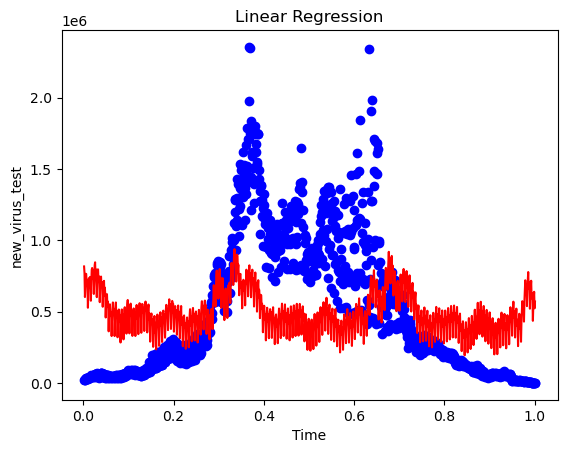

In [11]:
T = df.shape[0]
t = np.array(df.index).reshape(-1, 1) / T


plt.scatter(t, df['new_virus_test'], color='blue')
plt.plot(t, model.predict(X), color='red')
plt.xlabel('Time')
plt.ylabel('new_virus_test')
plt.title('Linear Regression')
plt.show()

In [12]:
#Regression bayésienne avec stan
stan_code = """
data {
    int<lower=0> N;
    int<lower=0> P;
    matrix[N, P] X;
    vector[N] y;
}
parameters {
    vector[P] beta;
    real<lower=0> sigma;

}
model {
    y ~ normal(X * beta, sigma);
    1./sigma ~ normal(0, 0.5);
}
"""

# Data
N = X.shape[0]
P = X.shape[1]
stan_data = {'N': N, 'P': P, 'X': pd.DataFrame(X).values, 'y': df["new_virus_test"].values}
posterior = stan.build(stan_code, data=stan_data, random_seed = 1)
fit = posterior.sample(num_chains = 4, num_samples = 1000)

df_fit = fit.to_frame()

Building...

In file included from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/onyxia/.cache/httpstan/4.9.1/models/c4rhqu2e/model_c4rhqu2e.cpp:2:
/opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl(c


Building: 16.8s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (

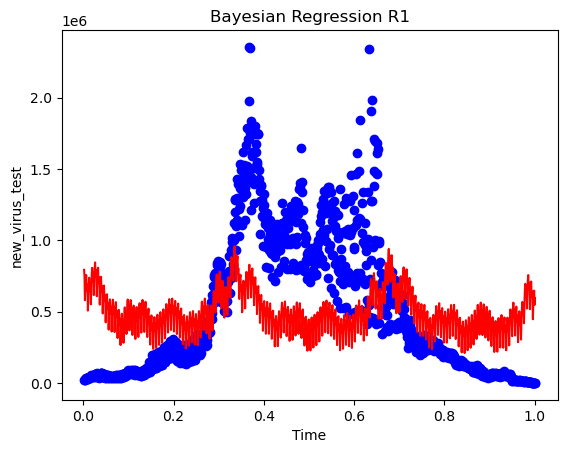

In [13]:
df_fit.head()
# Extract the posterior samples
posterior_samples = df_fit[['beta.1', 'beta.2', 'beta.3', 'beta.4', 'beta.5', 'beta.6', 'beta.7', 'beta.8', 'beta.9', 'beta.10', 'beta.11',       'beta.12', 'beta.13', 'beta.14', 'beta.15', 'beta.16', 'beta.17',       'beta.18', 'beta.19', 'beta.20', 'beta.21', 'beta.22', 'beta.23',       'beta.24', 'beta.25', 'beta.26', 'beta.27', 'beta.28', 'beta.29',       'beta.30', 'beta.31', 'beta.32', 'beta.33', 'beta.34', 'beta.35',       'beta.36', 'beta.37', 'beta.38', 'beta.39', 'beta.40', 'beta.41',       'beta.42', 'beta.43', 'beta.44', 'beta.45', 'beta.46']]

# Compute the posterior predictive distribution
y_pred = X.dot(posterior_samples.mean().values)
y_pred_std = X.dot(posterior_samples.std().values)

# Plot the posterior predictive distribution
#plt.figure(figsize=(15, 5))
plt.plot(t, y_pred, color='red')
plt.scatter(t, df['new_virus_test'], color='blue')
plt.xlabel('Time')
plt.ylabel('new_virus_test')
plt.title('Bayesian Regression R1')
plt.show()

In [14]:
#Regression linéaire simple pour theta 2:
X = mat_design
y = df["daily_cases"]
model = LinearRegression().fit(X, y)

epsilon = model.intercept_
theta = model.coef_

print("Intercept : ",epsilon)
print("Beta : ", theta)

Intercept :  -832881403925.0725
Beta :  [-7.67285969e+11  6.62875468e+02  9.59796127e+12  2.79755084e+15
  2.46165515e+15  1.12664280e+15 -1.12664280e+15 -2.46165515e+15
 -2.79755084e+15 -9.75681462e+11  2.92579823e+15  8.16153115e+15
 -2.51163236e+15 -2.51163236e+15  8.16153115e+15  2.92579823e+15
 -7.99779388e+12  7.74116499e+03 -3.48249043e+02 -2.94372308e+03
 -6.08964910e+03  6.43828577e+02  2.54442150e+03 -1.16683329e+03
 -2.21461377e+03 -3.20631177e+03 -1.45984867e+03  7.25658524e+02
  6.07502258e+02  5.12496355e+02  2.81697050e+02 -1.20991542e+12
 -9.93617415e+11  1.82302452e+12 -1.75834239e+12  1.37957309e+12
 -1.75834241e+12  1.82302451e+12 -9.93617416e+11 -1.20991542e+12
  3.90771324e+03  1.16171845e+03 -1.37125536e+03 -1.80523009e+03
  1.14886808e+03  1.66101458e+03]


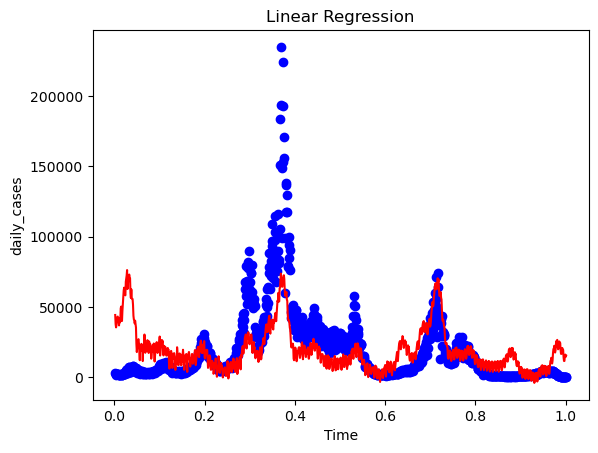

In [15]:
T = df.shape[0]
t = np.array(df.index).reshape(-1, 1) / T


plt.scatter(t, df['daily_cases'], color='blue')
plt.plot(t, model.predict(X), color='red')
plt.xlabel('Time')
plt.ylabel('daily_cases')
plt.title('Linear Regression')
plt.show()

In [16]:
#Regression bayésienne avec stan
stan_code = """
data {
    int<lower=0> N;
    int<lower=0> P;
    matrix[N, P] X;
    vector[N] y;
}
parameters {
    vector[P] beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(X * beta, sigma);
    sigma ~ normal(0, 0.5);
}
"""

# Data
N = X.shape[0]
P = X.shape[1]
stan_data = {'N': N, 'P': P, 'X': pd.DataFrame(X).values, 'y': df["daily_cases"].values}
posterior = stan.build(stan_code, data=stan_data, random_seed = 1)
fit = posterior.sample(num_chains = 4, num_samples = 1000)

df_fit = fit.to_frame()

Building...

In file included from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/onyxia/.cache/httpstan/4.9.1/models/lga3utqh/model_lga3utqh.cpp:2:
/opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl(c


Building: 17.4s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   3% (203/8000)
Sampling:   4% (303/8000)
Sampling:   5% (402/8000)
Sampling:   6% (502/8000)
Sampling:   8% (601/8000)
Sampling:   9% (701/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% 

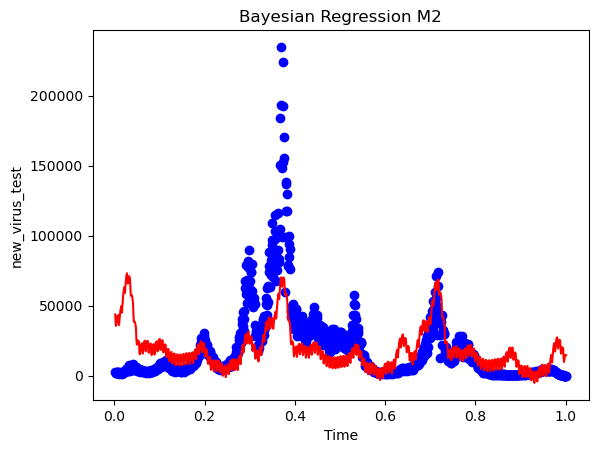

In [17]:
df_fit.head()
# Extract the posterior samples
posterior_samples = df_fit[['beta.1', 'beta.2', 'beta.3', 'beta.4', 'beta.5', 'beta.6', 'beta.7', 'beta.8', 'beta.9', 'beta.10', 'beta.11',       'beta.12', 'beta.13', 'beta.14', 'beta.15', 'beta.16', 'beta.17',       'beta.18', 'beta.19', 'beta.20', 'beta.21', 'beta.22', 'beta.23',       'beta.24', 'beta.25', 'beta.26', 'beta.27', 'beta.28', 'beta.29',       'beta.30', 'beta.31', 'beta.32', 'beta.33', 'beta.34', 'beta.35',       'beta.36', 'beta.37', 'beta.38', 'beta.39', 'beta.40', 'beta.41',       'beta.42', 'beta.43', 'beta.44', 'beta.45', 'beta.46']]

# Compute the posterior predictive distribution
y_pred = X.dot(posterior_samples.mean().values)
y_pred_std = X.dot(posterior_samples.std().values)

# Plot the posterior predictive distribution
#plt.figure(figsize=(15, 5))
plt.plot(t, y_pred, color='red')
plt.scatter(t, df['daily_cases'], color='blue')
plt.xlabel('Time')
plt.ylabel('new_virus_test')
plt.title('Bayesian Regression M2')
plt.show()

### Régression 1 du Modèle 1 

In [18]:
Model = """
data {
  int N; //nombre de données 
  int y[N]; //nombre de tests Covid
  int K; // nombre de colonnes de la matrice design
  matrix[N, K] X; //matrice design 
  vector[K] theta; //theta (voir mémoire Rég 1) correspondant au beta de la régression précèdente 
  // priors
  real reciprocal_sigma_scale; // borne sup de la loi normale que suit l'inverse du sigma (voir mémoire) 
}
parameters {
  real reciprocal_sigma; //inverse du sigma
}
transformed parameters {
  vector[N] mu;
  real sigma; //
  mu = exp(X * theta);
  sigma = 1. / reciprocal_sigma;
}
model {
  reciprocal_sigma ~ normal(0., reciprocal_sigma_scale);
  y ~ neg_binomial_2_log(mu, sigma);
}
generated quantities {
  vector[N] y_rep;
  for (i in 1:N) {
    y_rep[i] = neg_binomial_2_rng(mu[i], sigma);
  }
}
"""

In [19]:
len(theta)

46

In [20]:
%%capture
Data = {"y": list(df["new_virus_test"]),
                "N": len(y),
                "X": mat_design,
                "K" : mat_design.shape[1],
                "theta" : theta,
                "reciprocal_sigma_scale" : 0.5
       }


posterior = stan.build(Model, data=Data)
fit = posterior.sample(num_chains=4, num_samples=1000)
df2 = fit.to_frame()  # pandas `DataFrame`

In file included from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/onyxia/.cache/httpstan/4.9.1/models/ulz6uc2d/model_ulz6uc2d.cpp:2:
/opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl(c

RuntimeError: Exception during call to services function: `ValueError("Initialization failed. Rejecting initial value: Error evaluating the log probability at the initial value. Exception: neg_binomial_2_log_lpmf: Log location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_3ubn17ai/model_ulz6uc2d.stan', line 22, column 2 to column 36) Rejecting initial value: ...")`, traceback: `['  File "/opt/mamba/lib/python3.10/asyncio/tasks.py", line 232, in __step\n    result = coro.send(None)\n', '  File "/opt/mamba/lib/python3.10/site-packages/httpstan/services_stub.py", line 185, in call\n    future.result()\n', '  File "/opt/mamba/lib/python3.10/asyncio/futures.py", line 201, in result\n    raise self._exception.with_traceback(self._exception_tb)\n']`

In [21]:
print(fit)

<stan.Fit>
Parameters:
    beta: (46,)
    sigma: ()
Draws: 4000


In [22]:
X_theta = np.dot(mat_design, theta)**2

In [23]:
Model = """
data {
  int N; //nombre de données 
  int y[N]; //nombre de tests Covid
  int K; // nombre de colonnes de la matrice design
  vector[N] mu; //(matrice design *theta)**2
  // priors
  real reciprocal_sigma_scale; // borne sup de la loi normale que suit l'inverse du sigma (voir mémoire) 
}
parameters {
  real reciprocal_sigma; //inverse du sigma
}
transformed parameters {
  real sigma; //
  sigma = 1. / reciprocal_sigma;
}
model {
  reciprocal_sigma ~ normal(0., reciprocal_sigma_scale);
  y ~ neg_binomial_2_log(mu, sigma);
}
generated quantities {
  vector[N] y_rep;
  for (i in 1:N) {
    y_rep[i] = neg_binomial_2_rng(mu[i], sigma);
  }
}
"""

In [24]:
%%capture
Data = {"y": list(df["new_virus_test"]),
                "N": len(y),
                "mu": X_theta,
                "K" : mat_design.shape[1],
                "reciprocal_sigma_scale" : 0.5
       }


posterior = stan.build(Model, data=Data)
fit = posterior.sample(num_chains=4, num_samples=1000)
df2 = fit.to_frame()  # pandas `DataFrame`

In file included from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/onyxia/.cache/httpstan/4.9.1/models/os52622b/model_os52622b.cpp:2:
/opt/mamba/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl(c

In [25]:
print(fit) 

<stan.Fit>
Parameters:
    reciprocal_sigma: ()
    sigma: ()
    y_rep: (1065,)
Draws: 4000


In [26]:
df2

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,reciprocal_sigma,sigma,y_rep.1,...,y_rep.1056,y_rep.1057,y_rep.1058,y_rep.1059,y_rep.1060,y_rep.1061,y_rep.1062,y_rep.1063,y_rep.1064,y_rep.1065
draws,,,,,,,,,,,,,,,,,,,,,
0,-3.744482e+32,1.0,2.989919e-06,1.0,1.0,0.0,3.744482e+32,5.974515e+08,1.673776e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.744482e+32,1.0,9.345337e-07,2.0,3.0,0.0,3.744482e+32,4.839289e+08,2.066419e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.744482e+32,1.0,9.196275e-07,2.0,3.0,0.0,3.744482e+32,4.839289e+08,2.066419e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.744482e+32,1.0,3.537467e-06,2.0,3.0,0.0,3.744482e+32,5.533939e+08,1.807031e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.744482e+32,1.0,2.989919e-06,2.0,3.0,0.0,3.744482e+32,5.974515e+08,1.673776e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-3.744482e+32,1.0,3.537467e-06,1.0,1.0,0.0,3.744482e+32,5.533939e+08,1.807031e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,-3.744482e+32,1.0,2.989919e-06,1.0,1.0,0.0,3.744482e+32,5.974515e+08,1.673776e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,-3.744482e+32,1.0,9.345337e-07,2.0,3.0,0.0,3.744482e+32,4.839289e+08,2.066419e-09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
